In [214]:
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import MinMaxScaler

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="140" /> **AGL253 - Apicultura Sustentable**
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2023-2**<br>
**Profesor:** Gabriel Nuñez Quijada <br>
**Estudiantes:** Vicente Garay - Sofía Pereira - Benjamín Prieto - Matías Pineda -  Santiago Valenzuela

# **Proyecto Final:** Riesgo de colmenares por incendios forestales en época estival, según región.
---

En el curso de la actualidad, los incendios forestales han emergido como una amenaza persistente que se cierne especialmente durante la temporada estival. Este fenómeno, exacerbado por los estragos continuos del cambio climático, ha dado lugar a un patrón ominoso que se ha arraigado desafortunadamente en la conciencia colectiva. Las temperaturas estivales, impulsadas por estos cambios climáticos, han experimentado un aumento constante, sumiendo a comunidades enteras en una vulnerabilidad ineludible frente a los devastadores incendios forestales.

En el contexto de nuestra nación, esta realidad ambiental se manifiesta como una experiencia anual dolorosa, afectando a miles de personas y dejando cicatrices imborrables tanto en la geografía como en el tejido social. Es en este escenario que nos embarcamos en una investigación con el objetivo claro de arrojar luz sobre las áreas apícolas que han caído bajo la sombra amenazante de estos desastres naturales. Focalizándonos en la apicultura, una práctica de vital importancia para nuestras comunidades, buscamos proporcionar información esencial a nuestros colegas que dedican sus esfuerzos a esta labor, basándonos en datos recopilados por la CONAF desde el año 2014 hasta el 2021.

En nuestra búsqueda, nos proponemos desentrañar la razón del peligro, dividiendo la cantidad de hectáreas afectadas por la cantidad de incendios. Este enfoque nos permitirá identificar las mejores zonas para ubicar colmenas y, a su vez, señalar aquellas áreas de mayor riesgo. El propósito fundamental de esta iniciativa es contribuir a la mejora y resiliencia de la apicultura en Chile, brindando un recurso valioso tanto a los apicultores establecidos como a aquellos que están considerando ingresar a este sector.

Aspiramos a crear conciencia sobre las mejores prácticas para enfrentar la amenaza constante de los incendios forestales, promoviendo la identificación de áreas seguras y, al mismo tiempo, delineando estrategias para fortalecer la industria apícola en un entorno marcado por la inquietante regularidad de estos eventos naturales.


Desde el punto de vista del contenido, la presentación debe incluir los elementos listados a continuación:
- [ X ] Introducción del tema a exponer 
- [ ] Relación, comportamiento o utilización del tema por las abejas.
- [ ] De qué manera el ser humano se ve beneficiado con lo investigado.
- [ ] Método o forma de implementación de lo investigado.
- [ ] Breve análisis de mercado o impacto económico. ¿Se comercializa? ¿Cómo? Cuánto cuesta? Si no se hace
aún, ¿qué posibilidad existe de hacerlo?
- [ ] Conclusión: De qué manera proyecta su investigación y porque alguien se interesaría en trabajar sobre ella. Para aquellos que no tienen un tema aún, pondré a disposición algunas ideas de temas para que se puedan inscribir.



### Datos Obtenidos:
---
* https://www.conaf.cl/incendios-forestales/incendios-forestales-en-chile/estadisticas-historicas/ 
* https://websag.azurewebsites.net/sites/default/files/Bolet%C3%ADn%20Ap%C3%ADcola%20N%C2%BA8.pdf 

## Datos Cantidad de Incendios Forestales, sólo meses de Verano, por año y región.
---

In [215]:
years = np.arange(2014, 2022, 1)
lista_incendios = {}
for year in years:
    incendios_mes = pd.read_csv(f'Data/Incendios/ocurrencia_mes_{year}_{year + 1}.csv')
    incendios_mes = incendios_mes[(incendios_mes['MES'] == 'DICIEMBRE') | (incendios_mes['MES'] == 'ENERO') | 
                                  (incendios_mes['MES'] == 'FEBRERO') | (incendios_mes['MES'] == 'MARZO')]
    lista_incendios[year] = incendios_mes.set_index('MES').T

## Visualización Cantidad de Incendios Forestales: según Año, Mes y Región:
---

In [216]:
selected_year = years[0]
fig = px.bar(lista_incendios[selected_year], x=lista_incendios[selected_year].index, y=lista_incendios[selected_year].columns,
             title=f'Cantidad de Incendios por Mes y Región ({selected_year})',
             labels={'value': 'Cantidad de Incendios', 'variable': 'Mes'},
             template='plotly_dark', barmode='group')

fig.update_layout(updatemenus=[{'type': 'dropdown',
                                'name': 'Seleccionar Año',
                                'buttons': [{'label': str(year),
                                             'method': 'update',
                                             'args': [{'x': [lista_incendios[year].index],
                                                       'y': [lista_incendios[year][col] for col in lista_incendios[year].columns]},
                                                      {'xaxis.categoryorder': 'total ascending',
                                                       'title': f'Cantidad de Incendios por Mes y Región ({year})'}]}
                                            for year in years]}])

fig.update_xaxes(title_text='Region')
fig.show()

## Datos Cantidad de Hectáreas Dañadas por Incendios Forestales, sólo meses de Verano, por año y región.
---

In [217]:
years = np.arange(2014, 2022, 1)
lista_hectareas = {}
for year in years:
    hectareas_mes = pd.read_csv(f'Data/Danos/dano_hectareas_mes ({year} - {year + 1}).csv')
    hectareas_mes = hectareas_mes[(hectareas_mes['MES'] == 'DICIEMBRE') | (hectareas_mes['MES'] == 'ENERO') | 
                                  (hectareas_mes['MES'] == 'FEBRERO') | (hectareas_mes['MES'] == 'MARZO')]
    lista_hectareas[year] = hectareas_mes.set_index('MES').T

## Visualización Cantidad de Hectáreas Dañadas por Incendios Forestales: según Año, Mes y Región:
---

In [218]:
selected_year = years[0]
fig = px.bar(lista_hectareas[selected_year], x=lista_hectareas[selected_year].index, y=lista_hectareas[selected_year].columns,
             title=f'Cantidad de Hectareas Dañadas por Mes y Región ({selected_year})',
             labels={'value': 'Cantidad de Hectareas', 'variable': 'Mes'},
             template='plotly_dark', barmode='group')

fig.update_layout(updatemenus=[{'type': 'dropdown',
                                'name': 'Seleccionar Año',
                                'buttons': [{'label': str(year),
                                             'method': 'update',
                                             'args': [{'x': [lista_hectareas[year].index],
                                                       'y': [lista_hectareas[year][col] for col in lista_hectareas[year].columns]},
                                                      {'xaxis.categoryorder': 'total ascending',
                                                       'title': f'Cantidad de Hectareas Dañadas por Mes y Región ({year})'}]}
                                            for year in years]}])

fig.update_xaxes(title_text='Region')
fig.show()

# **Razón de Peligro:**
---
Se calculará la razón de peligro de una región a la fracción de la cantidad de hectáreas dañadas por la cantidad de incendios ocurridos, la idea es dar importancia a los incencios con mayor área y daño.

$$\Delta_{region} = \frac{\text{Cantidad de Hectareas}}{\text{Cantidad de Incendios}} \hspace{1cm} \forall region \in \text{Regiones de Chile}$$


In [219]:
lista_peligro = {}
for year in years:
    peligro = lista_hectareas[year].copy()
    for mes in peligro.columns:
        peligro[mes] = peligro[mes].divide(other=lista_incendios[year][mes])
        peligro[mes] = peligro[mes].fillna(0)
    lista_peligro[year] = peligro

Para este estudio se obtendrá el **Riesgo Histórico Mensual** por Región, que será el promedio de los riesgos de todos los años según la región y el mes estival. Este será el parámetro para determinar si un sector apícola actual está en potencial riesgo o no.

In [220]:
dict_regiones = {15: 'XV', 1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 13: 'RM', 6: 'VI', 7: 'VII', 
                 16: 'XVI', 8: 'VIII', 9: 'IX', 14: 'XIV', 10: 'X', 11: 'XI', 12: 'XII'}

In [221]:
regiones = gpd.read_file('Data/Regiones/Regional.shp')
regiones = regiones[['codregion', 'Region', 'geometry']].drop(16)
regiones['codregion'] = regiones['codregion'].apply(lambda x: dict_regiones[x])
regiones = regiones.rename(columns={'Region': 'Nombre', 'codregion': 'Region'})

In [222]:
Riesgo_DICIEMBRE =[]
Riesgo_ENERO = []
Riesgo_FEBRERO = []
Riesgo_MARZO = []

for year in years:
    dic = pd.Series([lista_peligro[year]['DICIEMBRE'][region] if region in lista_peligro[year].index else np.nan for region in regiones['Region']])
    ene = pd.Series([lista_peligro[year]['ENERO'][region] if region in lista_peligro[year].index else np.nan for region in regiones['Region']])
    feb = pd.Series([lista_peligro[year]['FEBRERO'][region] if region in lista_peligro[year].index else np.nan for region in regiones['Region']])
    mar = pd.Series([lista_peligro[year]['MARZO'][region] if region in lista_peligro[year].index else np.nan for region in regiones['Region']])
    
    Riesgo_DICIEMBRE.append(dic)
    Riesgo_ENERO.append(ene)
    Riesgo_FEBRERO.append(feb)
    Riesgo_MARZO.append(mar)

regiones['Riesgo DICIEMBRE'] = pd.concat(Riesgo_DICIEMBRE, axis=1).agg(np.mean, 1)
regiones['Riesgo ENERO'] = pd.concat(Riesgo_ENERO, axis=1).agg(np.mean, 1)
regiones['Riesgo FEBRERO'] = pd.concat(Riesgo_FEBRERO, axis=1).agg(np.mean, 1)
regiones['Riesgo MARZO'] = pd.concat(Riesgo_MARZO, axis=1).agg(np.mean, 1)

## **Visualización del Riesgo Historico Mensual, por Región y Mes.**
---

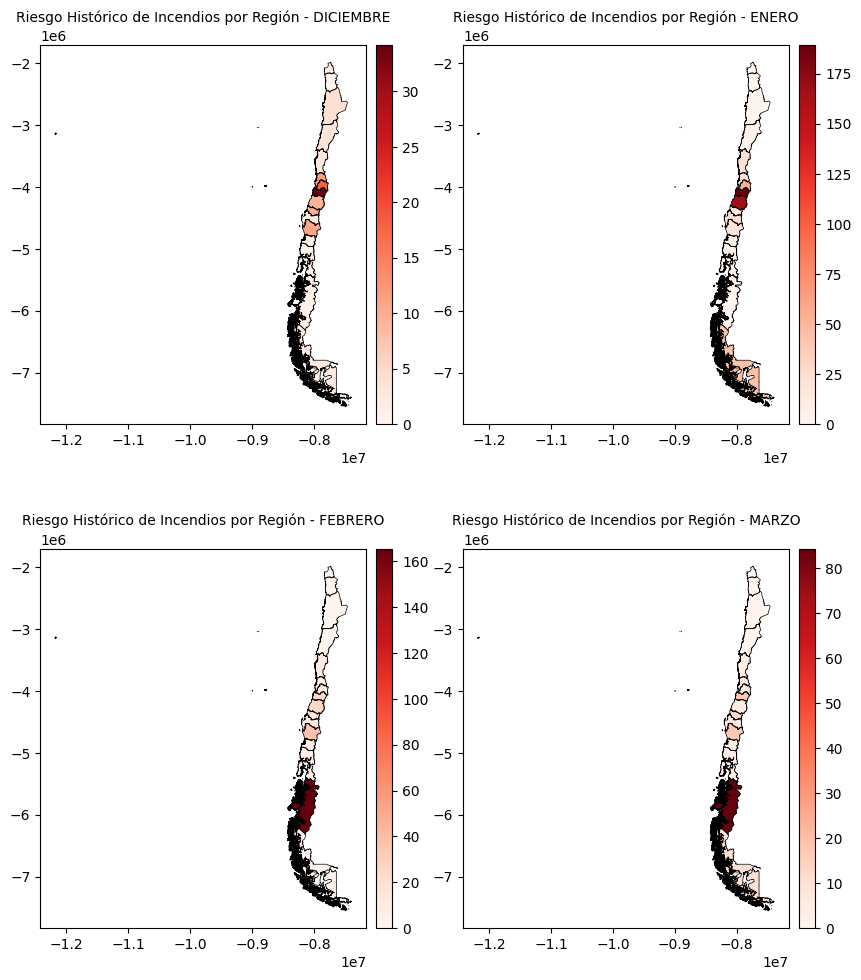

In [223]:
#Crear figura y ejes
fig, ax = plt.subplots(2, 2, figsize=(10,12))

divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes("right", size="5%", pad=0.1)

vmax=regiones['Riesgo DICIEMBRE'].max()
regiones.plot(ax=ax[0][0], column='Riesgo DICIEMBRE', cmap='Reds',legend=True, vmin=0, vmax=vmax, cax=cax)
ax[0][0].set_title('Riesgo Histórico de Incendios por Región - DICIEMBRE',fontsize=10)

divider = make_axes_locatable(ax[0][1])
cax = divider.append_axes("right", size="5%", pad=0.1)

vmax=regiones['Riesgo ENERO'].max()
regiones.plot(ax=ax[0][1], column='Riesgo ENERO', cmap='Reds',legend=True, vmin=0, vmax=vmax, cax=cax)
ax[0][1].set_title('Riesgo Histórico de Incendios por Región - ENERO',fontsize=10)

divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes("right", size="5%", pad=0.1)

vmax=regiones['Riesgo FEBRERO'].max()
regiones.plot(ax=ax[1][0], column='Riesgo FEBRERO', cmap='Reds',legend=True, vmin=0, vmax=vmax, cax=cax)
ax[1][0].set_title('Riesgo Histórico de Incendios por Región - FEBRERO',fontsize=10)

divider = make_axes_locatable(ax[1][1])
cax = divider.append_axes("right", size="5%", pad=0.1)

vmax=regiones['Riesgo MARZO'].max()
regiones.plot(ax=ax[1][1], column='Riesgo MARZO', cmap='Reds',legend=True, vmin=0, vmax=vmax, cax=cax)
ax[1][1].set_title('Riesgo Histórico de Incendios por Región - MARZO',fontsize=10)

limites = regiones.boundary
limites.plot(ax=ax[0][0],lw=0.5,color='k')
limites.plot(ax=ax[1][0],lw=0.5,color='k')
limites.plot(ax=ax[0][1],lw=0.5,color='k')
limites.plot(ax=ax[1][1],lw=0.5,color='k');

# **Zonas Apícolas:**
---

In [227]:
zonas_api = pd.read_csv('Data/Zonas Apicolas.csv').drop(columns=['Unnamed: 0']).rename(columns={'Unnamed: 1': 'Region', 'Razon': 'Densidad'})

Para determinar si una zona apícola presenta un peligro potencial a un incendio se calculará el riesgo, escalado a decimales entre 0 y 1, por la densidad apícola presente en la region, de modo que si dos regiones presentan riego se incendio muy parecidos la región con mayor densidad apícola estará en mayor peligro ya que el costo de salvaguardar los colmenares es mayor.

In [225]:
scaler = MinMaxScaler()
riesgo_api = regiones.merge(right=zonas_api[['Region', 'Densidad']], on='Region', how='inner')

for mes in ['DICIEMBRE', 'ENERO', 'FEBRERO', 'MARZO']:
    riesgo_api[f'Riesgo {mes}'] = scaler.fit_transform(riesgo_api[[f'Riesgo {mes}']])
    riesgo_api[f'Peligro Apícola - {mes}'] = riesgo_api[f'Riesgo {mes}'].mul(riesgo_api['Densidad'])

## **Visualización del Peligro Apícola, por Región y Mes.**
---

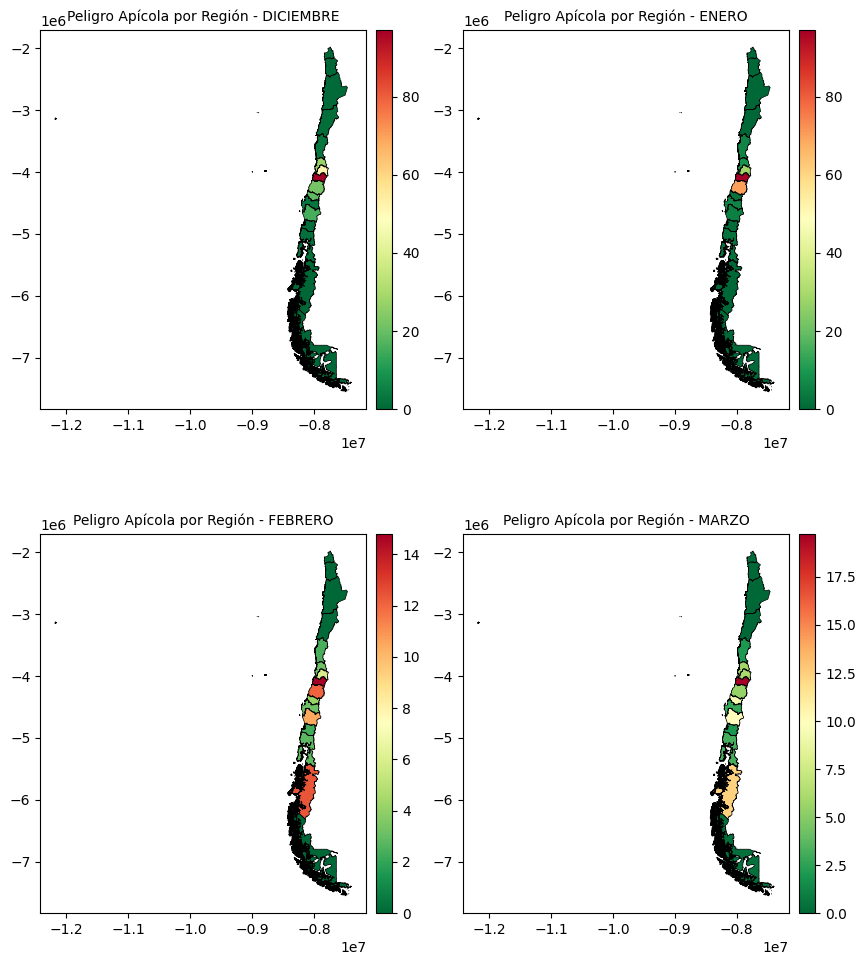

In [226]:
#Crear figura y ejes
fig, ax = plt.subplots(2, 2, figsize=(10,12))

divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes("right", size="5%", pad=0.1)

vmax=riesgo_api['Peligro Apícola - DICIEMBRE'].max()
riesgo_api.plot(ax=ax[0][0], column='Peligro Apícola - DICIEMBRE', cmap='RdYlGn_r',legend=True, vmin=0, vmax=vmax, cax=cax)
ax[0][0].set_title('Peligro Apícola por Región - DICIEMBRE',fontsize=10)

divider = make_axes_locatable(ax[0][1])
cax = divider.append_axes("right", size="5%", pad=0.1)

vmax=riesgo_api['Peligro Apícola - ENERO'].max()
riesgo_api.plot(ax=ax[0][1], column='Peligro Apícola - ENERO', cmap='RdYlGn_r',legend=True, vmin=0, vmax=vmax, cax=cax)
ax[0][1].set_title('Peligro Apícola por Región - ENERO',fontsize=10)

divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes("right", size="5%", pad=0.1)

vmax=riesgo_api['Peligro Apícola - FEBRERO'].max()
riesgo_api.plot(ax=ax[1][0], column='Peligro Apícola - FEBRERO', cmap='RdYlGn_r',legend=True, vmin=0, vmax=vmax, cax=cax)
ax[1][0].set_title('Peligro Apícola por Región - FEBRERO',fontsize=10)

divider = make_axes_locatable(ax[1][1])
cax = divider.append_axes("right", size="5%", pad=0.1)

vmax=riesgo_api['Peligro Apícola - MARZO'].max()
riesgo_api.plot(ax=ax[1][1], column='Peligro Apícola - MARZO', cmap='RdYlGn_r',legend=True, vmin=0, vmax=vmax, cax=cax)
ax[1][1].set_title('Peligro Apícola por Región - MARZO',fontsize=10)

limites = riesgo_api.boundary
limites.plot(ax=ax[0][0],lw=0.5,color='k')
limites.plot(ax=ax[1][0],lw=0.5,color='k')
limites.plot(ax=ax[0][1],lw=0.5,color='k')
limites.plot(ax=ax[1][1],lw=0.5,color='k');